<a href="https://colab.research.google.com/github/Gavriel55555/Data-science-project/blob/main/Used_car_price_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **introduction**

I am Gavriel Michaeli (209283720) ,computer science student who is passionate about data science.Since I work in the field of cars and I really like cars, I chose to do my project in this field.


# **The problem we deal with**

At a time when almost every family has a car and there is a high frequency of changing cars, many people wonder what the correct car price they should ask or a much time it will take to sell the car, or conversely what the real price of the car they want to buy . Most of the time people can search for vehicles similar to what they want to buy, but they won't always find one or they won't be able to get a correct price estimate.

I decided to solve this problem and put an end to this problem by building a smart AI model that will solve it.

# **About the project**

In this project we will use a database that we have on vehicle features, such as: company, type, time of sale, price and more, in order to predict the prices of the vehicles and the range of the time it will take to sell them.

First we will clean the data, after that we will present the data in a graphic display from which we can learn things about the data and the vehicles.
In addition, we will use PCA so that we can better understand the information we have and from which we can learn how to bulid the AI models.

 After that, an **ANN** model will be built in order to predict the time of the sales period and will be compared with a ready ANN model.
 
 And finally we will use models to predict the price of the vehicle and the SHAP values ​​in order to see what affects the prices of the vehicle mainly.

# **later in the project**

Later on in the project,I will check the cleaning process and see how can i impove that.

Also I would like to add more graphs that will show the different car companies and which company actually sells the most.
In addition, we would like to see what the average price is for the 20 best-selling companies.
We would like to add more graphs that will eventually show the buyers or sellers what they should buy or how much they should sell for, and for the buyers which car will ultimately be the most worthwhile for them to buy so that whenever they want to sell the car it will be easier for them.


In addition, I want to see from the models we built which variable most affects the price.

In the end we would like to obtain for each vehicle what is the average time it will take to sell and what is the appropriate price for which he should sell the vehicle, or what is the correct price that someone should pay for his vehicle.

# **Exploratory Data Analysis**

Now let's export the data set into pandas dataframe,and import the libraries we will use.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['cars1.csv']))

Saving cars1.csv to cars1 (4).csv


# **The data**

In [ ]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


As we mentioned in the introduction, the data has 38531 rows and 18 columns

# **First let's clean the data**

first we will drop all Nan values or empty values:


In [3]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

now we will check if there are duplicated rows

In [4]:
df[df.duplicated()].shape[0]

48

we will drop all duplicated

In [5]:
df = df.drop_duplicates()

Now lets see what is the min and max value fot the price, and let's check how much they appear

In [ ]:
print(f'min value for the price={df["price_usd"].min()}')
print(f'max value for the price={df["price_usd"].max()}')
print(f'the min value appears:{df[df["price_usd"]==df["price_usd"].min()].shape[0]} times')
print(f'the max value appears:{df[df["price_usd"]==df["price_usd"].max()].shape[0]} times')
print(f'there price between{df["price_usd"].value_counts(bins=[40000,50000])}')
print(f'prive between{df["price_usd"].value_counts(bins=[0,100])}')
print(f'price between{df["price_usd"].value_counts(bins=[0,200])}')

min value for the price=1.0
max value for the price=50000.0
the min value appears:5 times
the max value appears:2 times
there price between(39999.999, 50000.0]    126
Name: price_usd, dtype: int64
prive between(-0.001, 100.0]    15
Name: price_usd, dtype: int64
price between(-0.001, 200.0]    108
Name: price_usd, dtype: int64


We see that between 0-100 and 40000-50000 there are less values .so let's update the price to be in better range

The reason we are doing the cleaning of the data is because in the section of building a machine learning model the cars that fall to far apart from the mean value of price cause problems and decrease the accuracy of the model. it happans because that there are not enough edge cases in order to build accurate model for them.

In [ ]:
#i need to check this because maybe it ok to not do this. ,aybe it is better to do it by number of cars per year.
not_to_cheap = df["price_usd"] > 100
not_to_expensive= df["price_usd"] < 40000
df = df.where(not_to_cheap & not_to_expensive).dropna()
df = df.where(not_to_expensive).dropna()
print(df["price_usd"].value_counts(bins=[40000,50000]))

Series([], Name: price_usd, dtype: int64)


In [ ]:
len(df)

38332

We have 38332. This means we deleted 199 rows, which is fine and not a lot compared to our amount of data

# **Visualising The Data**((i will add more)

**Visualization using graphs can teach us a lot about our data. In this part we will try to understand what is in our data by means of different graphs and deduce from it things that can help us in the future and even others in the future who want to buy or sell a car.**



In [30]:
import matplotlib.pyplot as plt; 
import seaborn as sns

**First let's start with a few pieces of information that every seller or buyer will want to know when buying or selling a car.**

The goal is that by presenting the data we will be able to help the buyer in choosing his vehicle and also help the seller when selling his vehicle.


**The first** thing that can surely interest every person is what is the average time it takes to sell a car from each company.
From this information, the buyer or seller will receive information about the average time it takes to sell a car or, for the buyer, how long it will take him to sell a car in the future.

lets plot The 10 fastest selling companies.

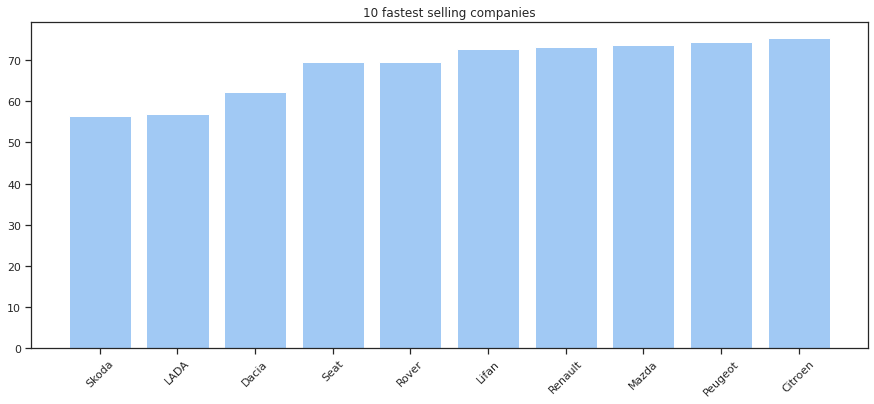

In [ ]:
time_avg={}
comp=list(df["manufacturer_name"].unique())
for x in comp:
  df_comp=df[df["manufacturer_name"]==x]
  time_avg[x]=(df_comp["duration_listed"].sum())/df_comp.shape[0]
time_avg={k: v for k, v in sorted(time_avg.items(), key=lambda item: item[1])}

company = list(time_avg.keys())
time_sell = list(time_avg.values())
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
plt.bar(range(10), time_sell[0:10], tick_label=company[0:10])
plt.title('10 fastest selling companies')
plt.show()

From here we see that the car that sells the fastest is Skoda.
Which could indicate that there is a lot of demand for this car. And of course from here we see the 10 vehicles that sell the fastest, and it is also clear that Skoda Dacia and Lada sell the fastest and then there is a bigger increase.

Now  as we have shown the vehicles that sell the fastest, let's see what the price range is, mean, let's see which vehicle is the cheapest/most expensive among this list of vehicles.

This way every buyer will be able to know which type of company is more expensive and which is less expensive.

In [ ]:
sk=df["manufacturer_name"]=="Subaru"
ld=df["manufacturer_name"]=="LADA"
DC=df["manufacturer_name"]=="Dacia"
se=df["manufacturer_name"]=="Seat"
ro=df["manufacturer_name"]=="Rover"
li=df["manufacturer_name"]=="Lifan"
re=df["manufacturer_name"]=="Renault"
ma=df["manufacturer_name"]=="Mazda"
pe=df["manufacturer_name"]=="Peugeot"
ci=df["manufacturer_name"]=="Citroen"
df_fastest_sell = df.where(sk | ld | DC |se|re|li|re|ma|pe|ci).dropna()

Text(0.5, 1.0, 'The effect of color on sales speed')

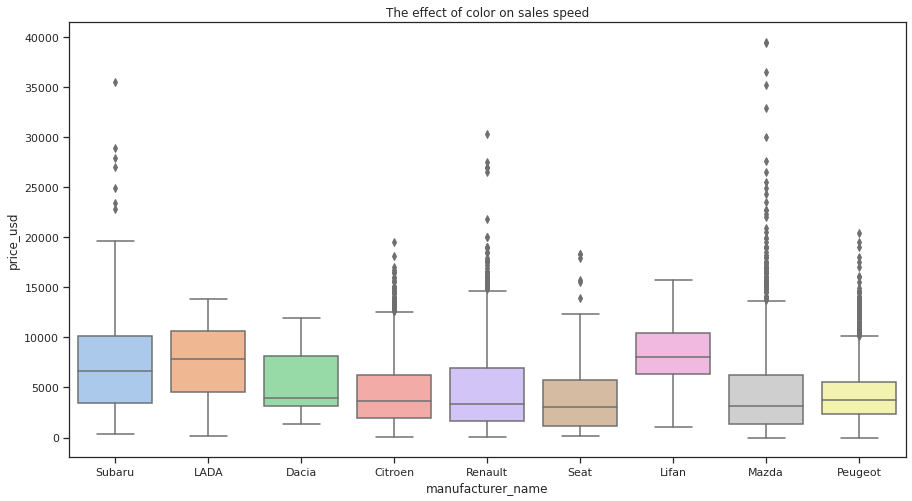

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="manufacturer_name", y="price_usd",data=df_fastest_sell)
plt.title('The effect of color on sales speed')

First let's explain the box plot : the line in the middle of each rectangle represents the median, the top line of the straight line represents 75% and the bottom line represents the 25th. Everything above and below the bounding lines are outliers points.

We can see for sure that LIFAN is the most expensive company among all these companies, and the cheapest company is SEAT,although we can see that there are many other vehicles that come within its familiar range such as Mazda or Dacia

**Another thing that can be of interest to every buyer is what are the things that most affect the price of the car.**

Every buyer who comes to buy a car should know what the thing that affects
the price of the vehicle.
Does a high engine volume affect the price,
Does the amount of kilometers a car has traveled affect the price and more.
Let's check what are these factors that affect the price.



First let's see the effect of the kilometes on the price of the car.

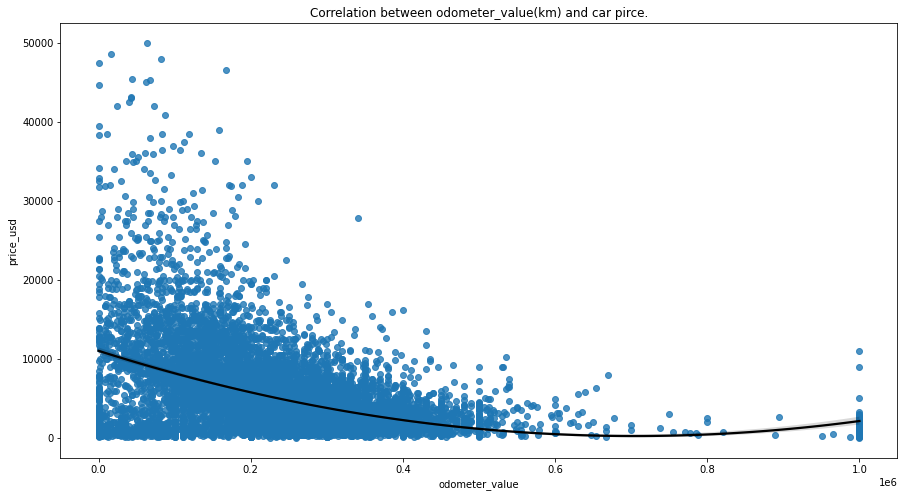

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between odometer_value(km) and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="odometer_value", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

As you can see, there is a correlation between the price and the km that the vehicle travels up to a certain limit, which means that if the odometer value is higher than the price is lower, sow if a buyer wants to buy a car he needs to know that the odometer vakue really effects the price.


now another thing to look is if there is a correlation between the engine and the car price.
does a big engine mean high price? this question is very important for everyone to understand what affects the vehicle.

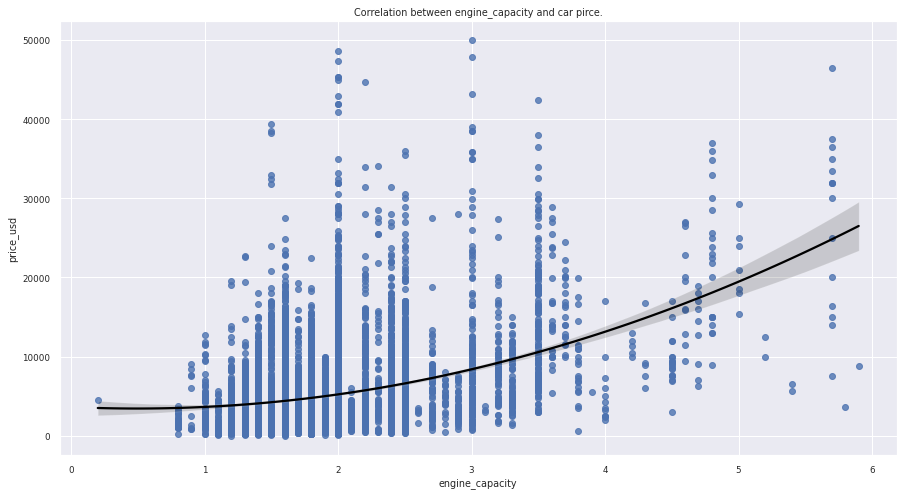

In [ ]:
plt.figure(figsize=(15,8))

plt.title('Correlation between engine_capacity and car pirce.')
df_plt = df.head(10000)

ax = sns.regplot(x="engine_capacity", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

We clearly see that the bigger the engine, the higher the price, so everyone should take into account that if they want a bigger and more powerful engine, then they will have to spend more money, but if someone doesn't care that much about the size of the engine, then they can save money by taking a car with a smaller engine.

Now a very interesting detail would be to check the effect of the year of the vehicle on the price.
As most of us might think, the older a car is, the cheaper it is compared to the same car in later years,
But is this really true for every year?
Let's check it out

Now let's plot the average price of the vehicles each year in order to see how it really affects

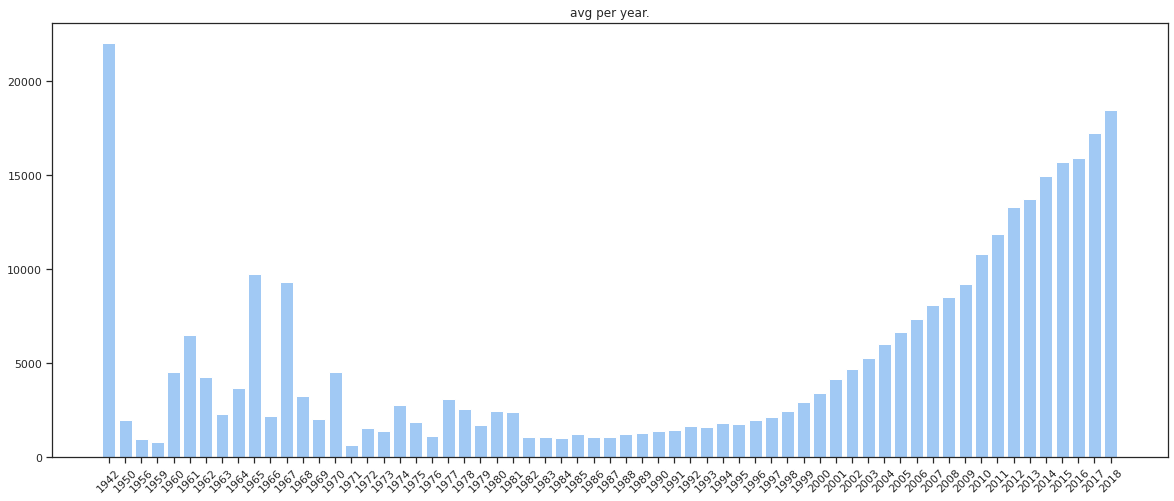

In [ ]:
price_avg={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean=df_year.price_usd.mean()
  if mean>0:
    price_avg[num]=mean
years = list(price_avg.keys())
price_year = list(price_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('avg per year.')
plt.bar(range(len(price_avg)), price_year, tick_label=years)
plt.show()

Wow, we see here that although starting in 1982 there is an increase every year in the price of the car and there is a correlation after 1982.
But before 1982 it is impossible to say clearly that there is a connection between the year of the vehicle and the price of the vehicle.
Let's try to understand why this happens and try to understand why it is.

First of all let's see how many vehicles from each year there are,
Between the years 1942-1981, so that we know whether it is several vehicles that affect the price or just a few.

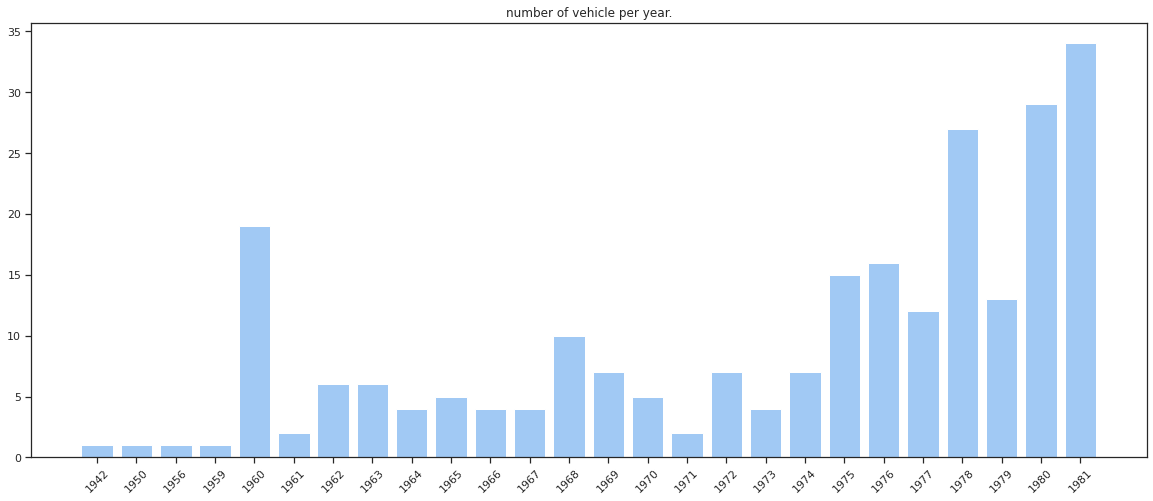

In [ ]:
count_year={}
min_year=df.year_produced.min()
max_year=1982
for num in range(min_year.astype(int),max_year):
  df_year=df[df.year_produced==num]
  count=df_year.shape[0]
  if count>0:
    count_year[num]=count
years = list(count_year.keys())
sum_year = list(count_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('number of vehicle per year.')
plt.bar(range(len(count_year)), sum_year, tick_label=years)
plt.show()

We see 2 things:

1. those kind of cars are very rare , and maybe that's is why they are expensive .
2.in most years there are enough vehicles to deduce necessary data

But wait, is every car in these years necessarily an expensive car?
Let's see what is the average kilometer that each vehicle travels each year and from that we will compare and try with what the condition of the vehicles is between the years 1942-1982

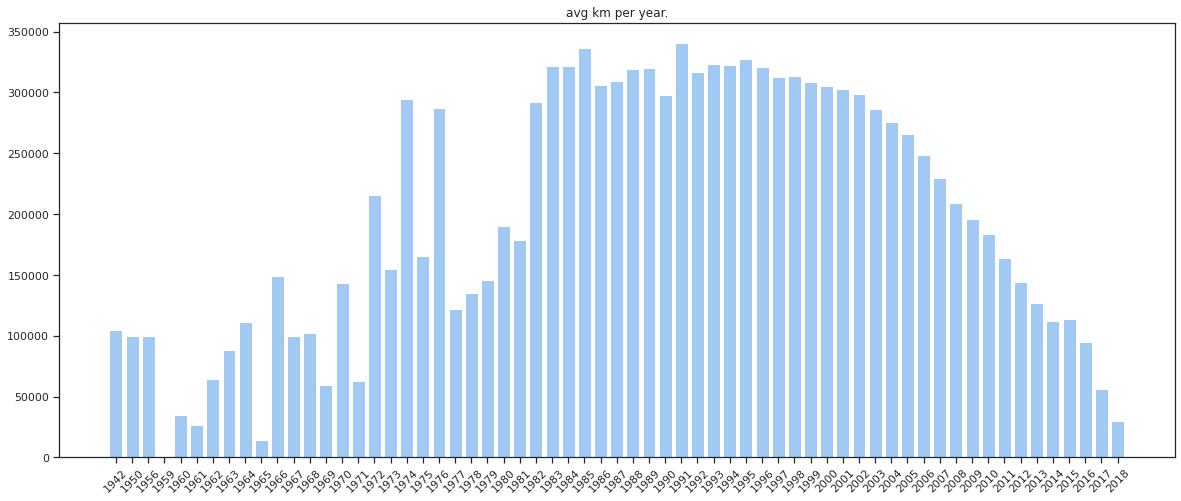

In [ ]:
km_year={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean_km=df_year.odometer_value.mean()
  if mean_km>0:
    km_year[num]=mean_km
years = list(km_year.keys())
sum_year = list(km_year.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('avg km per year.')
plt.bar(range(len(km_year)), sum_year, tick_label=years)
plt.show()

So really we see according to this graph that the cars between the years 1942-1982 are relatively preserved, that mean, that their mileage is relatively low for their years.

One thing that emerges from this is whether, even in these years, the kilometers traveled by a car really affect their price.

Le'ts checks this:
We will check if there is a corraltion between the cars kilometer and there price.

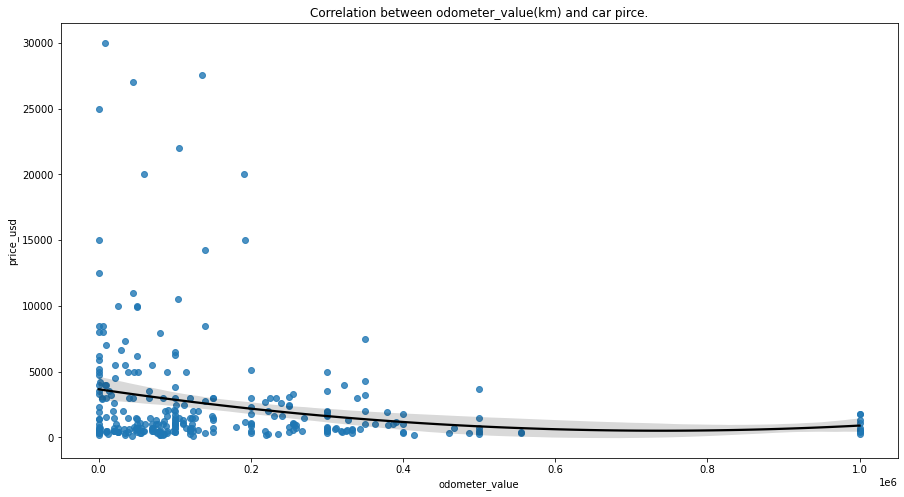

In [ ]:
not_old_cars= df["year_produced"] <1983
df_old_cars = df.where(not_old_cars).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation between odometer_value(km) and car pirce.')
ax = sns.regplot(x="odometer_value", y="price_usd", data=df_old_cars, line_kws={"color": "black"},order=2)

And really even here, even though these are very old vehicles, we see that the mileage of the vehicle has an effect on the price and we even see clearly from the graph that the most expensive vehicles in these years are vehicles with very low mileage and all the other vehicles with high mileage are not that expensive.

Among the most important questions that can help any buyer is also what type of vehicles are kept for the longest time and also which of these companies have the highest average price,                                    
So that if anyone who buys a car wants to keep it for a long time, he knows which company he should buy the most

{'LADA': 4, 'УАЗ': 5, 'Opel': 14, 'Москвич': 33, 'Dacia': 1, 'ВАЗ': 62, 'Fiat': 1, 'Ford': 13, 'Rover': 1, 'Volkswagen': 25, 'Audi': 7, 'ЗАЗ': 5, 'Toyota': 1, 'ГАЗ': 77, 'Volvo': 2, 'Pontiac': 1, 'Nissan': 3, 'BMW': 4, 'Mazda': 1, 'Land Rover': 1, 'Skoda': 1, 'Honda': 1, 'Mercedes-Benz': 29, 'Chrysler': 1}


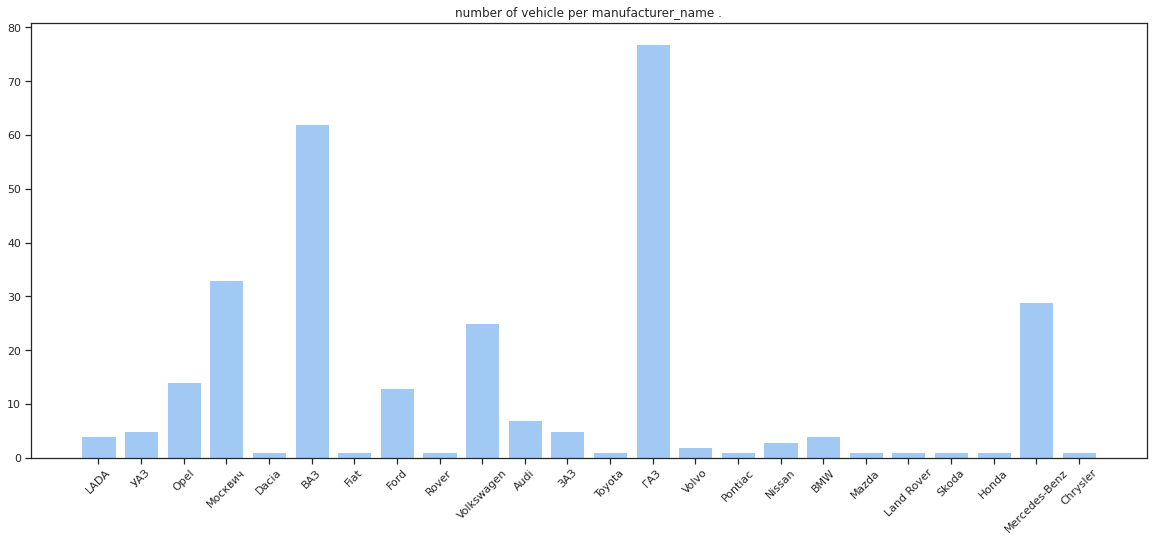

In [ ]:
old_cars_company={}
for x in df_old_cars["manufacturer_name"]:
  if x in old_cars_company:
    old_cars_company[x]+=1
  else:
    old_cars_company[x]=1
print(old_cars_company)
cars_comp = list(old_cars_company.keys())
number = list(old_cars_company.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.title('number of vehicle per manufacturer_name .')
plt.bar(range(len(old_cars_company)), number, tick_label=cars_comp)
plt.show()

From this graph we clearly see Mercedes, Volkswagen, Москвич, BA3, RA3
They are the vehicles that have the most vehicles between the years 1942-1982, so it may be possible to conclude that they are the vehicles that are kept the longest.

Now a very interesting thing would be to see the distribution of the prices of the vehicles between these years and the newer vehicles, so we can understand if the price of the vehicles really increased until 1982 compared to the other vehicles.

In [ ]:
df["old"]=""

In [ ]:
df = df.reset_index()
for i in range(len(df)):
  if df.year_produced.loc[i]<1983:
    df.loc[i, ['old']] = ["old"]
  else:
    df.loc[i, ['old']] = ["new"]

Text(0.5, 1.0, 'The effect of color on sales speed')

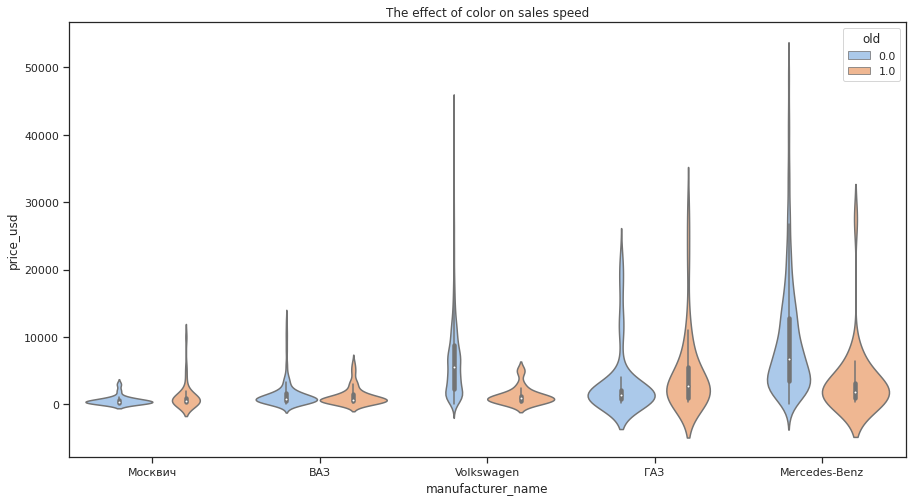

In [ ]:
li=df["manufacturer_name"]=="Mercedes-Benz"
re=df["manufacturer_name"]=="Москвич"
ma=df["manufacturer_name"]=="Volkswagen"
pe=df["manufacturer_name"]=="ГАЗ"
ci=df["manufacturer_name"]=="ВАЗ"
df_old_sell = df.where(li|re|ma|pe|ci).dropna()
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="manufacturer_name", y="price_usd",data=df_old_sell,hue="old")
plt.title('The effect of color on sales speed')

We can certainly see that Москвич and ГАЗ are the two companies that the older cars cost in avg more then the newer cars.
also in years 1942-1982 the most expensive cars are mercedes and ГАЗ have the most expensive vehicles in these years.
That is, we see that there are vehicles from these companies that are very expensive compared to other companies and their average is also higher.



Now that we have researched and seen that there are old vehicles that really have a high cost in relation to their years, it fits with the fact that vintage vehicles are defined as vehicles that have been on the road for 40 years, and that's really how it fits with the data because such vehicles are rarer as we have shown and some of them are also really expensive.

**now lets go back to explore things that will help all ...**

now its would be very intresting to see if the number of photos the seller adds to the  ad really helps selling the car fasrer.
it could tell us if its necessary to add photos and how much is good

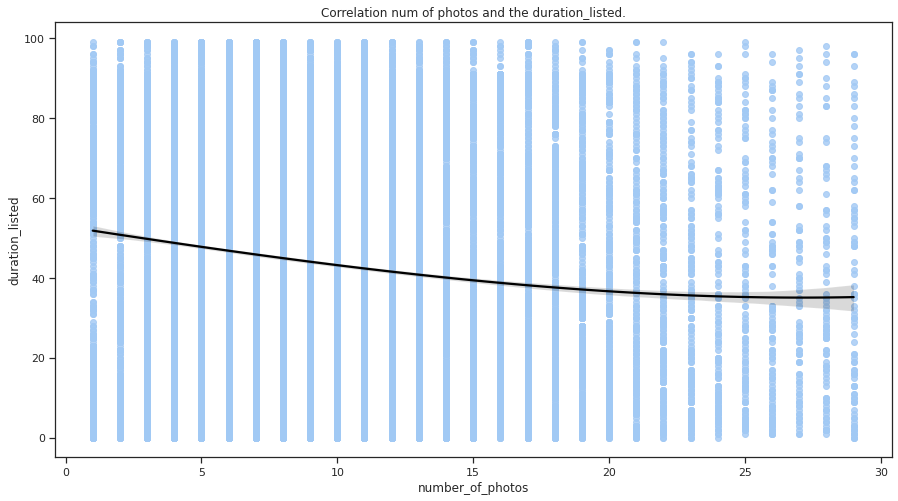

In [ ]:
under_1000=df["duration_listed"]<100
under_30_pho=df["number_of_photos"]<30
df_under_1000=df.where(under_1000 & under_30_pho).dropna()
plt.figure(figsize=(15,8))
plt.title('Correlation num of photos and the duration_listed.')
ax = sns.regplot(x="number_of_photos", y="duration_listed", data=df_under_1000, line_kws={"color": "black"},order=3)

We clearly see that the more pictures there are, the faster the vehicle is sold.
All this is true as you can see up to a certain number of photos because after that it no longer affects the speed of the sale so much.

Now there are people who will eventually want to buy a car that will be the easiest to sell and for that they need to know which companies are the most popular among people.
In addition, there are people who are interested in getting one of the most popular vehicles,  vehicles that are the most sold and there are the most of them among most people.

To that end, let's see what the 10 most popular companies are, that is, the 10 companies that have the most vehicles.


In [ ]:
ten_most_popular_companies = df['manufacturer_name'].value_counts().index.tolist()[0:10]
ten_most_popular_companies
df_popular_companies = df[df['manufacturer_name'].isin(ten_most_popular_companies)]

Text(0.5, 1.0, 'average price by city')

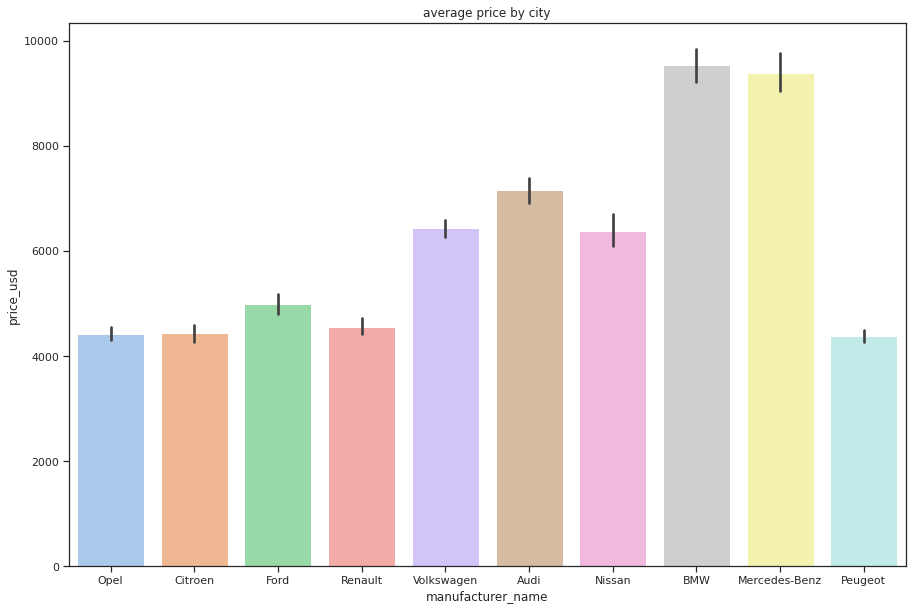

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , data = df_popular_companies, edgecolor = 'w').set_title('average price by city')

We now see the 10 most popular companies, and in particular it can be noticed that Mercedes and Mov are the two most popular companies.
Therefore, any person who wants a popular car or a car that will be easy to sell in the future can buy one of these cars.

Now some people will say that they are only interested in knowing what is the average price of that type of vehicle they want, because we see according to our data that there are many types of vehicles, so everyone will say that they are only interested in what is the average price of each company for a certain type of vehicle.
Therefore, let's see what the average price of each type of vehicle is from the 10 most popular vehicles that we have shown.

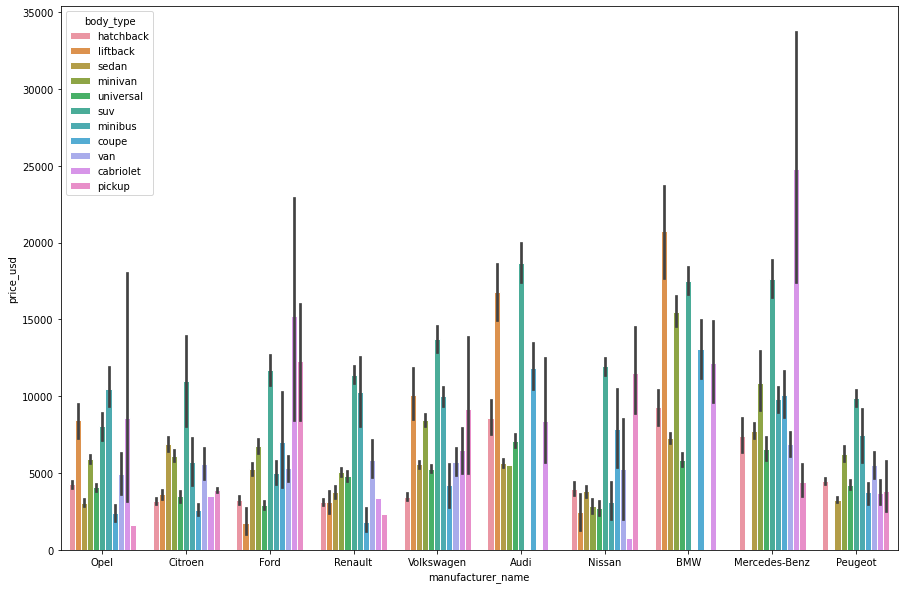

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'manufacturer_name', y = 'price_usd' , hue = "body_type", data = df_popular_companies, edgecolor = 'w')

Now we can see what the price is for each type of vehicle in each company, so that everyone can decide in relation to their budget which company to buy the vehicle from and he receives more accurate information for the type of vehicle he wants, and also each seller will know according to his company what the status of his vehicle is in relation to the other companies And what is the approximate price that he could demand.


Another thing that can really help any buyer or seller is to know if the type of gearbox really affects the price of the car, let's check this and see if there really is an effect of the type of gearbox in each company on the price of the car.


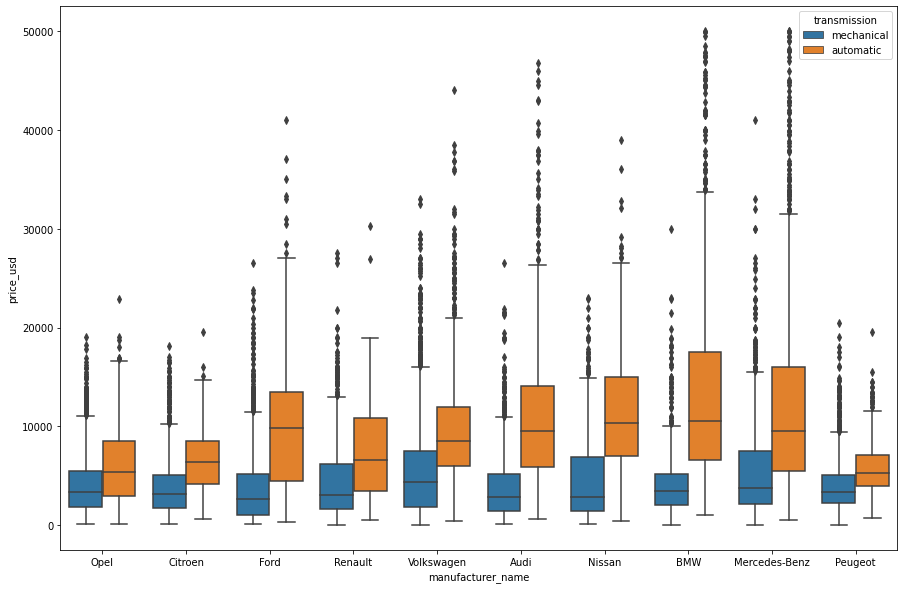

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'manufacturer_name', y = 'price_usd' , hue = "transmission", data = df_popular_companies)

We clearly see that in every company we investigate, the automatic transmission is more expensive than a manual transmission, from this we can conclude that:

1. For those who don't care about the gearbox, then maybe it's worth considering the manual gearbox because it's cheaper.

2. Anyone who sells a car should take into account the type of gearbox they have in order to know what price they should ask for.

In [ ]:
df_num = df.select_dtypes(include=np.number)

del df_num["odometer_value"]
del df_num['engine_capacity']
del df_num['number_of_photos']
del df_num['year_produced']
df_num['car_type']=df['body_type']

In [ ]:
df_num.head()

,price_usd,duration_listed,car_type
0,10900.00,16,universal
1,5000.00,83,universal
2,2800.00,151,suv
3,9999.00,86,sedan
4,2134.11,7,universal


In [ ]:
ten_most_popular_models = df['model_name'].value_counts().index.tolist()[0:3]
ten_most_popular_models

In [ ]:

for car in ten_most_popular_companies:
  df_car=df[df.manufacturer_name==car]
  popular_model = df['model_name'].value_counts().index.tolist()[0:3]

Let's see the prices of the cars

Text(0.5, 1.0, 'cars Price avg=6507')

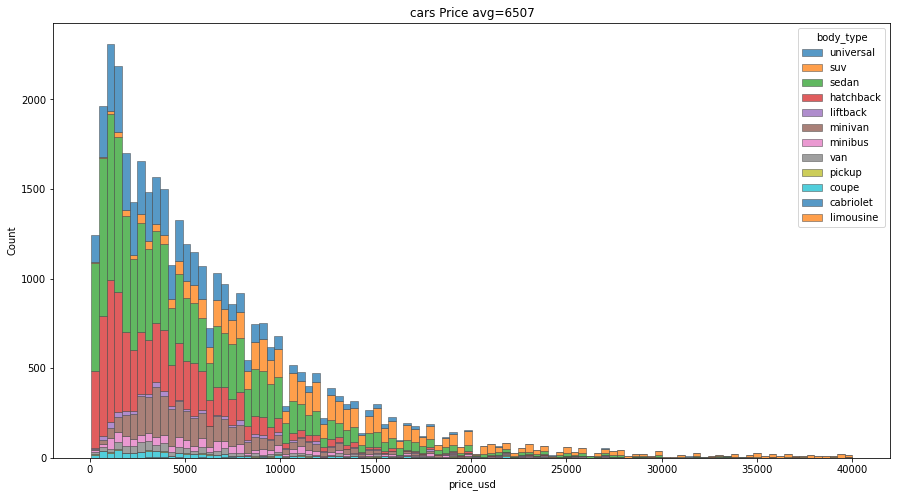

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot( df, x="price_usd", hue="body_type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price_usd'].mean()
plt.title(r'cars Price avg='+str(round(mean)))

we see that the avg price is 6640, and we see that as soon as the price starts to rise there are fewer vehicles.
Also we see that the amount of cars that cost more then 20000 is low.

le'ts see the correlation between the price and the odometer_value(km) .

Now let's see the average price for every year

We can see that starting from 1982 there is an increase from year to year in car prices, which means that starting from 1982 the price of the car is affected by the year. Before 1982 there is no clear correlation between car prices per year.

Now let's see the impect of the engine_capacity on the price

3D graph that shows correlation between year_product,odometer_value and 
price.

Text(0.5, 0.92, 'Correlation between year_product, nodometervalue and pirce.')

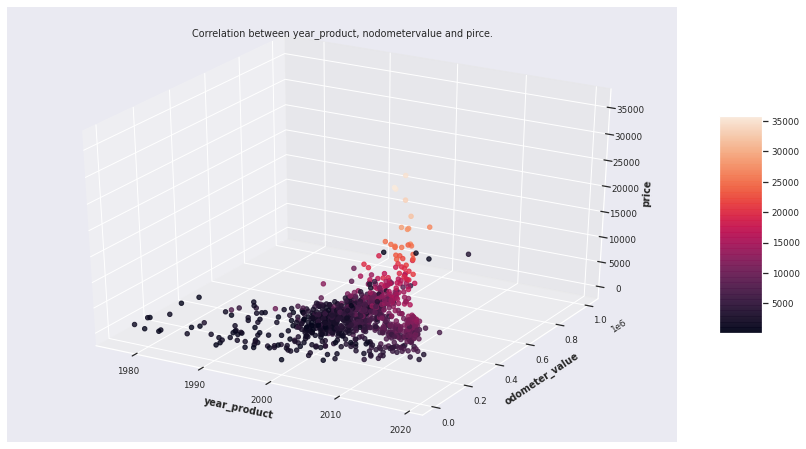

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection ="3d")

df_plot = df.head(1000);
x = df_plot["year_produced"]
y = df_plot["odometer_value"]
z = df_plot["price_usd"]
sctt = ax.scatter3D(x, y, z, c = z ,alpha = 0.8 )


ax.set_xlabel('year_product', fontweight ='bold')
ax.set_ylabel('odometer_value', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between year_product, nodometervalue and pirce.')

We see that the color does not have that much of an effect on the speed of the sale, except for the color orange, where we do see that it takes longer than the other colors to be sold

Text(0.5, 1.0, 'The effect of color on the price')

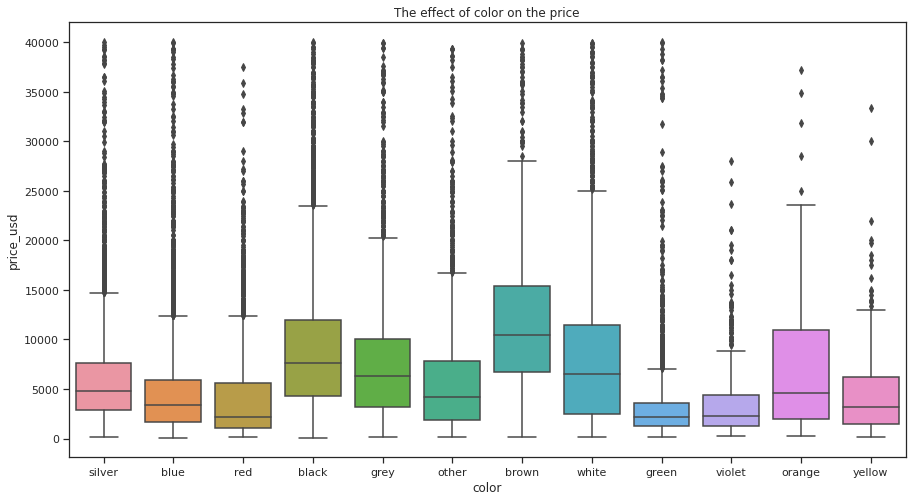

In [ ]:
# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="color", y="duration_listed",  hue="transmission", data=df)
plt.title('The effect of color on sales speed')

Text(0.5, 1.0, 'The effect of color on sales speed')

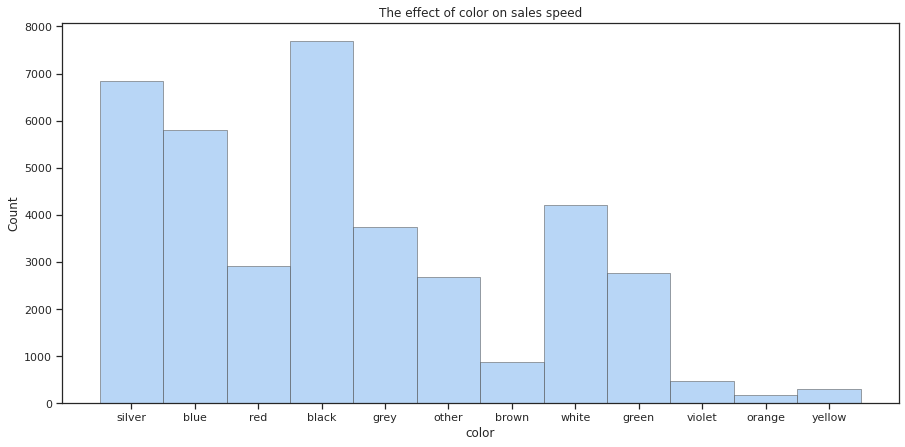

In [ ]:
# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,7))
sns.histplot( df, x="color", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )
plt.title('The effect of color on sales speed')

we can see from the graph that the brown color is the most expensive,while the green color less expensive.

lest draw a pie chart that describes the distribution of different cars body

Text(0.5, 1.0, 'Distribution of different house types')

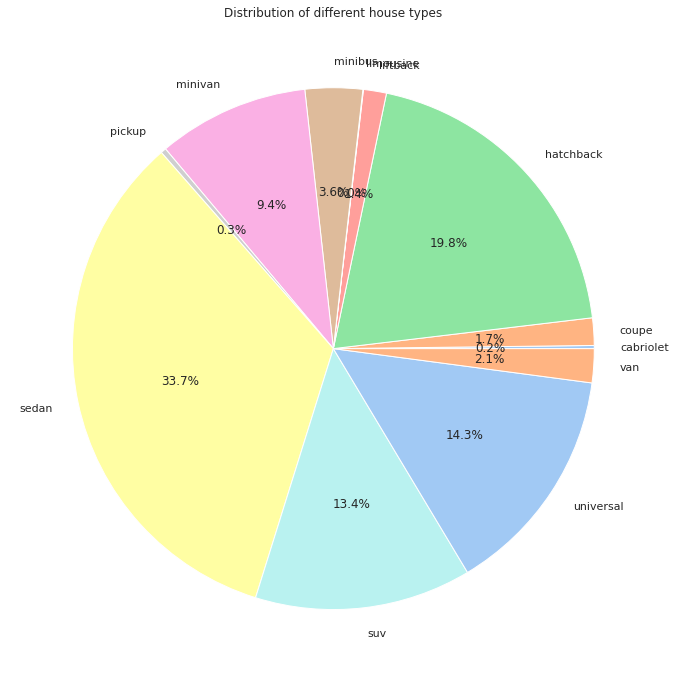

In [ ]:
data = df.groupby("body_type").count()
labels  = data.index.values.tolist()
data_list =  data['manufacturer_name'].tolist()

plt.figure(figsize=(18,12))
plt.pie(data_list, labels = labels, autopct='%.1f%%')
plt.title('Distribution of different house types')

The thing that can be learned from this graph is that most of the vehicles that are sold are private vehicles: such as hatchback, sedan, SUV, universal.
And then it's more commercial vehicles like minivans, buses, etc.
And also the sedan' suv , hatchback are common sense they are family cars and "comfort" cars so it make sense.

Now let's look at the heatmap to see if the corralation between the featurs (numrtic)

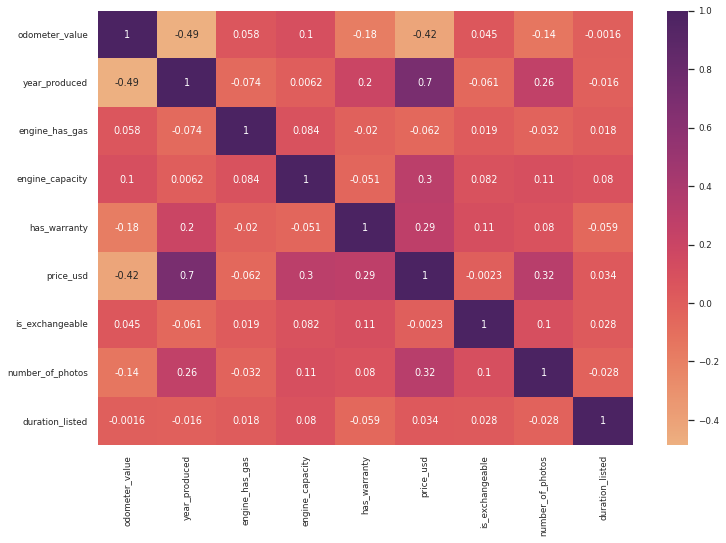

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = sns.color_palette("flare", as_cmap=True))

As you can see, we got a pretty strong correlation of 0.72 between the year of manufacture and the price of the vehicle, but the year of manufacture is not enough to predict the price of the vehicle.
So the explanation for this is that only numerical values ​​were taken, so we know that there are other non-numerical characteristics that affect the price of the vehicle, such as the vehicle model and the company, which also have a strong impect on the price

Now a smart thing to do would be to reduce the dimension of our data so that we can see and learn how the features affect what we want to predict, so what we will do is reduce the data to a dimension so that we can visualize our data in a graph.

# **UMAP**

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [7]:
import umap

First let's use StandardScaler to normalize the data(so that big number wont impect so much) and labelEncoder to make colums numeric, also lets seperate the data (features,target)

In [8]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable']


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

classes = df1['price_usd'].reset_index(drop=True)

features = df1.drop(['price_usd'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

In [11]:
reducer_2d = umap.UMAP(n_components=2)

In [13]:
embedding = reducer_2d.fit_transform(features_norm)
embedding.shape

(38473, 2)

In [16]:
principalDf_2 = pd.DataFrame(data = embedding, columns = ['PC 1', 'PC 2'])
principalDf_2["price"] = classes
principalDf_2['pirce_bins'] = pd.cut(x=principalDf_2['price'], bins=[1000, 2500, 5000, 8000, 11000, 15000, 21000, 27000, 35000, 52000, 100000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

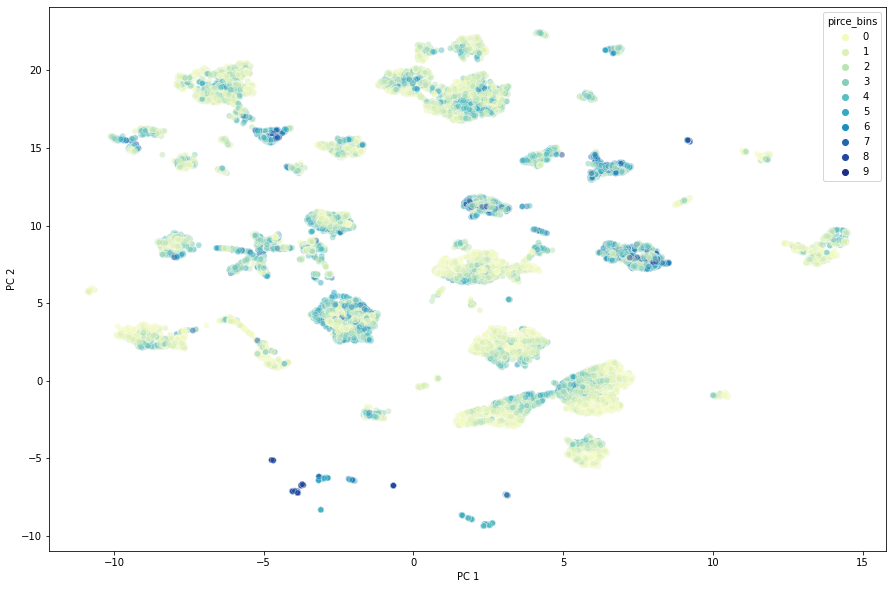

In [19]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf_2, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  ) 

We see that we do not get clear results from the UMAP algorithm. The parts we received PC1, PC2 do not synchronize with the price of the vehicle.

But that's okay, let's try another method to reduce the dimension.
We will try to use PCA


# **PCA**

PCA is another method to reduce the dimension of our data to any chosen dimension.
It uses the variability of the data and thus selects the features that have the most impact on the data

let's us the PCA methood to reduce our data dimension to better understand our data and to see if the is a correlation in our data to now whice model to built for our data.

Now we will define the PCA algorithm

In [20]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["price"] = classes

pca.explained_variance_ratio_ 

array([0.14124296, 0.12279679])

First, what are the numbers we got?
What we got are two numbers that represent one column and the other so that 14.1% represents the difference (variance) in price according to column 1 and 12.2% represents the difference according to column 2

Now that's weird becase according to the heatmap we got 72% correlation between the year_produced and the price_usd and 42% correlation between odometer_value and price_usd so its surprising that the pca didnt find a coraltion that the variance with the price is more then 14%.

Now lets plot the impect of the to colums on the price , but in order to plot it we will add a colum of the price is bins

In [21]:
principalDf['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[1000, 2500, 5000, 8000, 11000, 15000, 21000, 27000, 35000, 52000, 100000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

principalDf.head()

,PC 1,PC 2,price,pirce_bins
0,2.074186,0.902465,10900.00,3
1,1.749565,1.236099,5000.00,1
2,0.802050,0.303210,2800.00,1
3,1.538432,0.126058,9999.00,3
4,1.758111,0.936515,2134.11,0


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

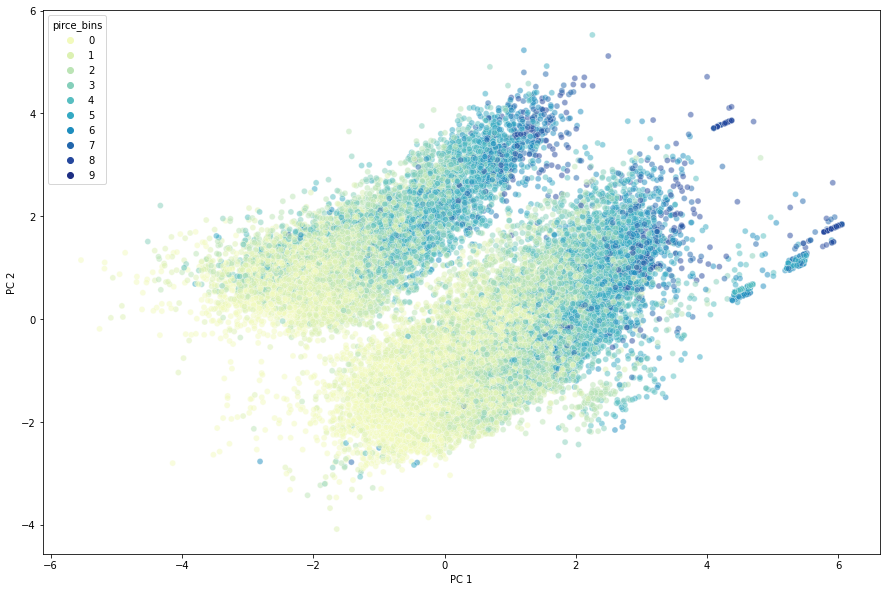

In [22]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  ) 

we can see a correlation between the increase of PC 1 and PC 2 value to the increase in the price value.So we will use it when we are buliding our models becasue we can see a that the 2 main components explain us the variance in price.


Therefore, after using PCA to see how our data relates to the price of the car, let's try to predict the price of the car:

# **prediction**

**Now,prediction-**, we would like to use our data to help any seller or buyer. we will help to choose a car that souts there needs , help to get the right car price and also we will bulid model to tell the seller how much time it will take to sell the car.

# **Building models for car price prediction**

Now we would like to predict a car price according to all our given parameters.

In many cases there are car advertisements that do not show the price of the car, and there are also many cases where the car owner does not exactly know what price he should demand for the car. We will solve this and address these issues by allowing anyone to list the vehicle's specifications and then receive the estimated price of the vehicle.

In [ ]:
df['manufacturer_name'].value_counts()
print(df['manufacturer_name'].unique().size)
print(df['manufacturer_name'].value_counts())

First we will check what are the non numeric colums

In [ ]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

We will use labelEncoder to make the non numeric to numeric

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

split our data to train and test 

In [9]:
from sklearn.model_selection import train_test_split
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["price_usd"]]
x=df.loc[:,var_columns]
y = df.loc[:,'price_usd']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (38473, 18)
(30778, 17)
(30778,)
(7695, 17)
(7695,)


Now we will use 5 model to predict the car price and we will comper

# **Linear Regression**

We will import the models from Sklearn.
The first model is linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train,y_train)
Linear.score(x_valid,y_valid)

0.6634560302834166

# **Gradient Boosting**

An acceptable model to use, when you want to predict linear information.
For each training example in this model we try to learn and correct the previous predictions

In [ ]:
import xgboost

grad = xgboost.XGBRegressor().fit(x_train, y_train)
grad.score(x_valid,y_valid)

[14:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8911948807059711

# **Decision Trees-Regression**

tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt = dt.fit(x_train,y_train)
dt.score(x_valid,y_valid)

0.8225461564425154

# **Random Forest-Regression**

random forest - using multiple trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest = random_forest.fit(x_train,y_train)
random_forest.score(x_valid,y_valid)

0.9152012904848332

# **SVR Regression**

As we know, every training sample can be looked at as a vector, so that in the end it will be possible to use SVR so that its purpose is to give the linear classifier on the training group when they are vectors.

In [ ]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')   
model_svr.fit(x, y)
model_svr.score(x_valid,y_valid)

# **Comparing the Models with Mean squared error**

In addition we will use MSE so that it will also tell us which model is the best.
Basically this method tells us what is the distance/difference of our prediction from the original price, i.e. what is the variance.

In [ ]:
from sklearn.metrics import mean_squared_error
#linear 
y_pred=Linear.predict(x_valid)
print(f' linear regression mse :{mean_squared_error(y_valid, y_pred)}')
#Gradient Boosting
y_pred=grad.predict(x_valid)
print(f' Gradient Boosting mse :{mean_squared_error(y_valid, y_pred)}')
#Decision Trees-Regression
y_pred=dt.predict(x_valid)
print(f' Decision Trees mse :{mean_squared_error(y_valid, y_pred)}')
#Random Forest-Regression
y_pred=random_forest.predict(x_valid)
print(f' random forest mse :{mean_squared_error(y_valid, y_pred)}')
#svr mse:

 linear regression mse :14236083.503236806
 Gradient Boosting mse :4602544.996286446
 Decision Trees mse :7506441.838735433
 random forest mse :3587054.3472856334


According to the MSE index, we see that random forest has the lowest error, so we will choose it as the best model that can predict the prices.
the error of the random forest mse is 3573105.

# **Compering real price and predction**

After we have chosen random forest as the best model, we would really like to see its prediction and compare it to the real price of the vehicle, so it will give us the difference between the predicted and the real price.

In [ ]:
import random
var_columns = [c for c in df if c not in ["price_usd"]]
pre=df.loc[:,var_columns]
x=pre.loc[150]
x = pre.iloc[150,:].to_frame().T

for i in range (5):
  x=random.randint(0,x_valid.shape[0])
  featurs=pre.iloc[x,:].to_frame().T
  print(f'the predicted price: {random_forest.predict(featurs)[0]} , the real price: {df.loc[x].price_usd}')

the predicted price: 2084.4 , the real price: 1400.0
the predicted price: 4285.9188 , the real price: 5800.0
the predicted price: 13273.091999999999 , the real price: 13700.0
the predicted price: 1828.6843999999994 , the real price: 7250.0
the predicted price: 4603.8104 , the real price: 5450.0


We can really see that we are getting pretty good results.

Except maybe the fourth one where it could be that they gave a price in advance that is very high compared to the real price of the vehicle


# **Let's explain our result-explain how each feature affects the model**

Now that we have all the models let's take the best model and explore it.
We would like to check which features affected the model, and for that we will use SHAP

# **SHAP vaules**

SHAP values explain how each feature affects the model, and allows analysis for the dataset 

So the question that should be asked is which features most affect the performance of our model?

lets install the snap package that will help us answer this question 

In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade shap

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [ ]:
import shap
explainer = shap.Explainer(random_forest)
shap_values = explainer(x_valid)

In order to understand the importance or contribution of the features for the whole dataset, let's plot the bee swarm plot:

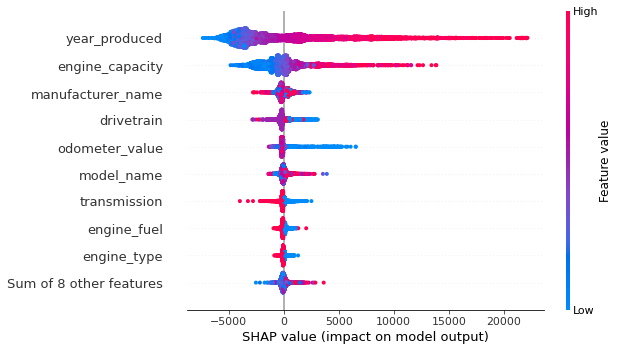

In [ ]:
# visualize the first prediction's explanation
shap.plots.beeswarm(shap_values)

On the beeswarm the features are ordered by their effect on prediction,
we can also see how higher and lower values of the feature will affect the result.

for example, we can that a high value of the year_product has big impact on the model, and low value of year_product doesnt help the model, whice make sense because we showed that very old cars may have different price then we expected.

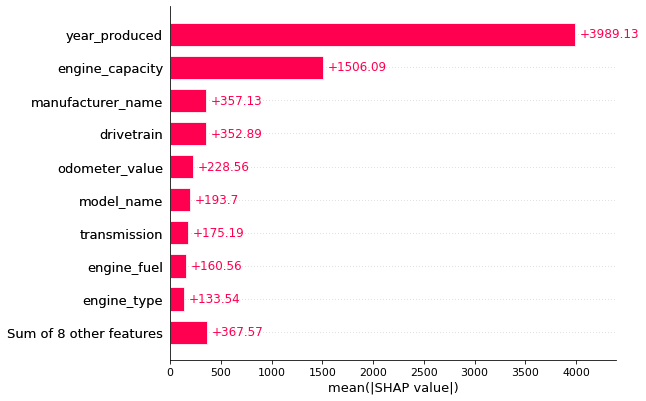

In [ ]:
shap.plots.bar(shap_values)

Although the chart is less important, the important thing is to look at the relationship between the bars.
So the bigger the bar appears the more influence the variable has on the output of the function.
 
 This is how we see, for example, that the year of the vehicle and the size of the engine have a large effect on the price of the vehicle, as well as the car company.
The other pitches have less effect on the model.

**Now anoter way to help is to predict the company of the car.**

A lot of people know what features they want in a car, so what we do is we tell them to enter the desired features from our data and we will bring them the company that has the vehicle that suits them.

# **classify the company**

First we would like to help every buyer find the company that has the data they want:
All the buyer will have to enter is:
1. The year of the vehicle he wants.
2. Engine size
3. The price of the vehicle
4. km of the vehicle
5. Price
6. Amount of photos in the ad.


In [6]:
df1=df
df_num = df.select_dtypes(include=np.number)
df_num["manufacturer_name"]=df["manufacturer_name"]

/tmp/ipykernel_51170/2541918135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["manufacturer_name"]=df["manufacturer_name"]


First we will change all the non-numeric columns to numeric values, so that we can apply our data to learning algorithms.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

Let's look at our dataset now, the whole data contains now only numeric values. So it means we can start training the model.

In [9]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,45,763,0,8,190000,2010,2,0,1,2.5,10,0,2,0,10900.00,0,9,16
1,45,763,0,1,290000,2002,2,0,1,3.0,10,0,2,0,5000.00,1,12,83
2,45,519,0,7,402000,2001,2,0,1,2.5,9,0,2,0,2800.00,1,4,151
3,45,609,1,1,10000,1999,2,0,1,3.0,8,0,2,0,9999.00,1,9,86
4,45,664,0,0,280000,2001,2,0,1,2.5,10,0,2,0,2134.11,1,14,7


Now we will divide our data into input and target and then divide each of them into validation training.
The training is intended to train the model, that is, data that the model will learn from, and the validation will be used to test the model and to check the accuracy percentage of the model

In [8]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df_num if c not in ["manufacturer_name"]]
x=df_num.loc[:,var_columns]
y = df_num.loc[:,'manufacturer_name']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (38473, 18)
(34625, 6)
(34625,)
(3848, 6)
(3848,)


now after we ordert our data we can try to classify the manufacturer_name.
we will use decision tree , rnadom forest tree , and suv , and we will see whice model gives us the best results.

# **Decision tree**

In [54]:
model_tree = DecisionTreeClassifier(max_depth=100, class_weight='balanced') #ccp_alpah is the

print(model_tree.fit(x_train, y_train))
model_tree.fit(x_train,y_train)
pre=model_tree.predict(x_valid)

DecisionTreeClassifier(class_weight='balanced', max_depth=100)


In [55]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print(accuracy_score(y_valid,pre))

0.25805613305613306


# **Forest tree**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

clf = RandomForestClassifier(max_depth=40,class_weight='balanced',n_estimators=300)
print(clf.fit(x_train, y_train))
pre2=clf.predict(x_valid)
print(accuracy_score(y_valid,pre2))

RandomForestClassifier(class_weight='balanced', max_depth=40, n_estimators=300)
0.3482328482328482


In [ ]:
feature_names=x.columns
feature_importance=pd.DataFrame(model_tree.feature_importances_,index=feature_names)
print(feature_importance)

                         0
odometer_value    0.178355
year_produced     0.151458
engine_capacity   0.169398
price_usd         0.231027
number_of_photos  0.118447
duration_listed   0.151315


# **svc**

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm=SVC()
svm.fit(x_train,y_train) 
y_pred=svm.predict(x_valid)
print(accuracy_score(y_valid,y_pred))

0.11512474012474012


We see that in all our models we get not so good results and our best model is forest tree with an accuracy percentage of about 35 percent.
So let's try to improve our models to bring better results.

So let's try first to balance our data so that all of our model will have the same amount of data in all of our data.

we will use SMOTE for that. smote is a...

In [ ]:
!pip install -U imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print(f' new shape: {x_train_resampled.shape},{y_train_resampled.shape}')
print(f' old shape: {x_train.shape},{y_train.shape}')

 new shape: (38422, 6),(38422,)
 old shape: (34625, 6),(34625,)


we see that we have now 4000 more data , so maybe it would help our models.

also something that is highly recommended to do is to standardize.
It actually makes sure that the model is more accurate because it is less affected by noise and gives all the features an effect on the mode

In [12]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train_resampled = x_scalar.fit_transform(x_train_resampled)
x_valid = x_scalar.transform(x_valid)

notice that we train the scalar on the x_train and we do not use the x_valid in the training process, because we dont want the test to be involved in the training process

now afther we improved our data, lets try now to see the models results:

# **Decision tree**

In [57]:
model_tree = DecisionTreeClassifier(max_depth=200, class_weight='balanced') #ccp_alpah is the

print(model_tree.fit(x_train_resampled, y_train_resampled))
model_tree.fit(x_train,y_train)
pre=model_tree.predict(x_valid)
print(accuracy_score(y_valid,pre))

DecisionTreeClassifier(class_weight='balanced', max_depth=200)
0.25805613305613306


we dont see an improvment in the decision tree, maybe the algorithm doentnt car about imbalced data and normalize data doent affect it becuase we now that the gini algorithm is same for all kind of data.

# **Forest tree**

In [13]:
clf = RandomForestClassifier(max_depth=100,class_weight='balanced',n_estimators=300)
print(clf.fit(x_train_resampled, y_train_resampled))
pre2=clf.predict(x_valid)
print(accuracy_score(y_valid,pre2))

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=300)
0.3518711018711019


also here we dont see much improvment , for the same reason like in the random tree

# **svm**

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm=SVC()
svm.fit(x_train_resampled,y_train_resampled)
y_pred=svm.predict(x_valid)
print(accuracy_score(y_valid,y_pred))

0.21777546777546777


We clearly see an improvement only in SVM, perhaps because only there there is an effect from data that has not been standardized, so we mainly see an improvement in it.

# **Let's explain our result**

first lets try to explain why we got only 35% .
we can see that are numrtic features are The year of the vehicle,
Engine size,
The price of the vehicle,
km of the vehicle,
Price,
Amount of photos in the ad.
alot of cars have the same engine size and same kn and ect.
So there is no special feature that really separates the types of companies.

now kers see what most effect our model

In [ ]:
feature_names=x.columns
feature_importance=pd.DataFrame(clf.feature_importances_,index=feature_names)

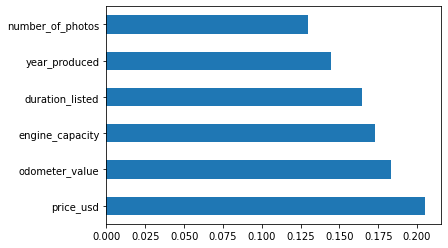

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We clearly see that what affects the model the most is the price of the vehicle, followed by the mileage of the vehicle and the engine.
What is less influential is the number of photos in the ad and the year of production, if we think about it, it is quite logical because the number of photos is not so related to the type of vehicle and also every year there are large amounts of vehicles, so it makes sense.

In conclusion we accept that forest tree is the best model.
It is true that we get an accuracy of about 35 percent, but with the data we processed it makes quite a lot of sense

Now let's get back to helping the car seller.
Everyone would really like to know approximately how long it will take them to sell the vehicle, so let's find out.

# **ANN-classify the time range of the sale**

Now something that is very important to every seller is how long it will take him to sell his car.
We would like to build a model so that everyone can enter the data of their vehicle, the price they demand and we will predict how long it will take them to sell the vehicle.
This will give information to every seller.

For this prediction we will use a deep learning model which will give us the time of sale.
We will use the Pytorch library and build a neural network that will help us with this.

we will import from pytorch

In [17]:
import torch
import torch.nn as nn
import numpy as np
import torch.functional as F

In [18]:
df_ann=df

In [19]:
from sklearn.preprocessing import LabelEncoder
var_columns = [c for c in df_ann if c not in "duration_listed"]
encoder = LabelEncoder()
for x in var_columns:
  encoder.fit(df_ann[x])
  df_ann[x]= encoder.transform(df_ann[x])

In [20]:
print('Shape of all dataset: {}'.format(df.shape))

var_columns = [c for c in df_ann if c not in "duration_listed"]
x=df_ann.loc[:,var_columns]
y = df_ann.loc[:,'duration_listed']
print(x.shape)
print(y.shape)

Shape of all dataset: (38473, 18)
(38473, 17)
(38473,)


Let's separate to train and valid and normalize the data.
also we will use labelencoder to make all colums numeric

In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(30778, 17)
(30778,)
(7695, 17)
(7695,)


In [22]:
y_train=y_train.values.reshape(30778,1)
y_valid=y_valid.values.reshape(-1,1)
print(y_train.shape)

(30778, 1)


In [23]:
from sklearn.preprocessing import StandardScaler
x_scalar=StandardScaler()
x_train = x_scalar.fit_transform(x_train)
x_valid = x_scalar.transform(x_valid)

lets make the data to be torch

In [24]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid, dtype=torch.float)

**Neural network structure**

In [25]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(x_train.shape[1],1)
    
    
  def forward(self,x):
    x=self.layer1(x)
    return x

Let's define the model the optimizer and the loss.

In [65]:
#import torch.optim as optim
model1 = NN()
optimizer= torch.optim.Adam(model1.parameters(),lr=0.3)
loss_fn=nn.MSELoss()

In [52]:
def get_acc(model1) :
  with torch.no_grad():
    test_inputs = x_valid
    test_outputs = model1(test_inputs)
    test_loss = loss_fn(test_outputs, y_valid)
    return test_loss

train the model

In [66]:
loss_per_iter={}
acc_per_iter={}
epochs=111
for i in range(epochs):
  #initialize the model parameter
  #optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model1(x_train)
  loss=loss_fn(output,y_train)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
    loss_per_iter[i]=loss
    acc_per_iter[i]=get_acc(model1)
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:19373.57421875
epochs: 10......loss:18786.587890625
epochs: 20......loss:18243.443359375
epochs: 30......loss:17746.333984375
epochs: 40......loss:17311.86328125
epochs: 50......loss:16777.220703125
epochs: 60......loss:16339.3876953125
epochs: 70......loss:16207.0126953125
epochs: 80......loss:15797.4990234375
epochs: 90......loss:15187.7958984375
epochs: 100......loss:14969.931640625
epochs: 110......loss:15272.68359375


We see that we get very good results on the training set and every EPOCH there is an improvement of the error.

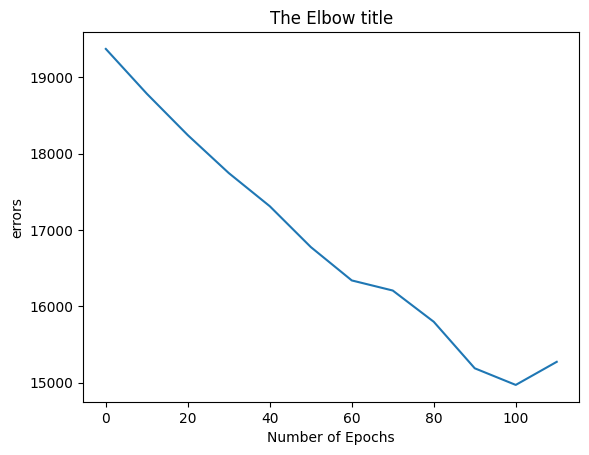

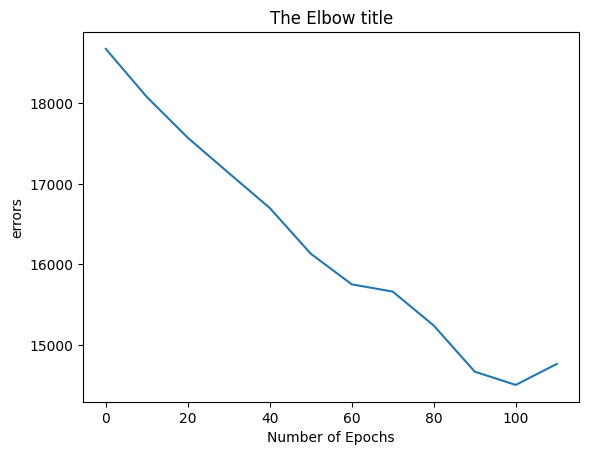

In [67]:
with torch.no_grad():
  num_iter = list(loss_per_iter.keys())
  loss_per_iter = list(loss_per_iter.values())
  plt.plot(num_iter,loss_per_iter)
  plt.title('The Elbow title')
  plt.xlabel('Number of Epochs')
  plt.ylabel('errors')
  plt.show()

  num_iter2 = list(acc_per_iter.keys())
  acc_per_iter = list(acc_per_iter.values())
  plt.plot(num_iter2,acc_per_iter)
  plt.title('The Elbow title')
  plt.xlabel('Number of Epochs')
  plt.ylabel('errors')
  plt.show()

Let's see what results we get on our test set.

In [68]:
with torch.no_grad():
  test_inputs = x_valid
  test_outputs = model1(test_inputs)
  test_loss = loss_fn(test_outputs, y_valid)

  print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 14762.1729


In [81]:
x_valid[2,:]

tensor([ 0.4598, -0.9504,  0.7080,  0.7049, -1.1816,  0.8806,  0.7221, -0.1910,
         0.7095, -0.9775, -1.6401, -0.1027,  0.1356, -0.0043,  0.5402, -0.7307,
         1.5451])

In [86]:
import random
with torch.no_grad():
  var_columns = [c for c in df if c not in ["duration_listed"]]
  pre=df.loc[:,var_columns]
  x=pre.loc[150]
  x = pre.iloc[150,:].to_frame().T

  for i in range (5):
    x=random.randint(0,x_valid.shape[0])
    featurs=x_valid[x,:]
    print(f'the predicted time: {model1(featurs)[0]} , the real time: {df.loc[x].duration_listed}')

the predicted time: 37.2298469543457 , the real time: 91
the predicted time: 36.13016891479492 , the real time: 21
the predicted time: 114.42945098876953 , the real time: 91
the predicted time: 61.803001403808594 , the real time: 60
the predicted time: 57.764617919921875 , the real time: 10


# let's comper it to Multi-layer Perceptron (MLP) from sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
clf = MLPClassifier(random_state=1,activation='relu',batch_size=100, max_iter=550,learning_rate='adaptive',hidden_layer_sizes=[100],verbose=False)
clf.fit(x_train, y_train)
pre3=clf.predict(x_train)
print(accuracy_score(y_train,pre3))

# **Summary**